In [26]:
import pymongo
from pymongo import MongoClient
import pandas as pd
import numpy as np

### No need to run again once run because it will accumulate in MongoDB

# call out the csv file
df = pd.read_csv('data/public-transport-utilisation-average-trip-distance/public-transport-utilisation-average-trip-distance.csv', sep=',')
#print(df['year'][1])


# to push in the dataset into MongoDB
client = MongoClient()
db = client.publicTransportAvgDist # client.database_name
collection = db.publicAvgDist #db.collection_name
#print(collection)

for i in range(0,len(df)):
    #print(type(df['year'][i]))
    #print({"year": df['year'][i]})
    collection.insert_one({"year": int(df['year'][i]),
                           "mode": df['mode'][i],
                          "ave_distance_per_trip":df['ave_distance_per_trip'][i]}) # convert to python int not numpy int

    
# Plot the graph using seaborn


# https://stackoverflow.com/questions/30098263/inserting-a-document-with-pymongo-invaliddocument-cannot-encode-object?rq=1

                         _id  ave_distance_per_trip  mode  year
0   5c5446c0b741c1062c67a555                   11.5   MRT  2004
1   5c5446c0b741c1062c67a556                    0.0   LRT  2004
2   5c5446c0b741c1062c67a557                    5.2   Bus  2004
3   5c5446c0b741c1062c67a558                    8.5  Taxi  2004
4   5c5446c0b741c1062c67a559                   11.5   MRT  2005
5   5c5446c0b741c1062c67a55a                    0.0   LRT  2005
6   5c5446c0b741c1062c67a55b                    5.4   Bus  2005
7   5c5446c0b741c1062c67a55c                    8.8  Taxi  2005
8   5c5446c0b741c1062c67a55d                   11.3   MRT  2006
9   5c5446c0b741c1062c67a55e                    0.0   LRT  2006
10  5c5446c0b741c1062c67a55f                    5.3   Bus  2006
11  5c5446c0b741c1062c67a560                    9.1  Taxi  2006
12  5c5446c0b741c1062c67a561                   11.2   MRT  2007
13  5c5446c0b741c1062c67a562                    0.0   LRT  2007
14  5c5446c0b741c1062c67a563            

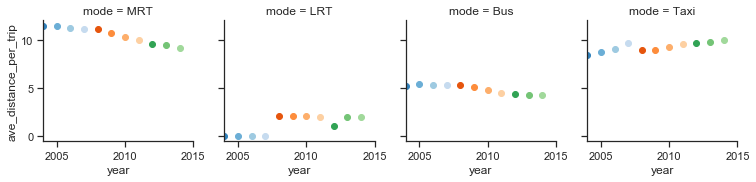

In [38]:
import pymongo
from pymongo import MongoClient
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# call out dataset from MongoDB
client = MongoClient()
db = client.publicTransportAvgDist # client.database_name
collection = db.publicAvgDist #db.collection_name

cursor = collection.find({})
# Expand the cursor and construct the DataFrame
df =  pd.DataFrame(list(cursor))
print(df)
#cursorList = list(cursor)  # when you list(cursor), cursor has changed also



    
# Seaborn to plot graphs
sns.set(style="ticks")

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="mode", hue="year", palette="tab20c",
                     col_wrap=4, height= 2.7)

# Adjust the tick positions and labels
grid.set(xlim=(2004, 2015))

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "year", "ave_distance_per_trip", marker="o")




#https://seaborn.pydata.org/examples/many_facets.html